### Setup

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
path = "../dat/tracks.csv"
data = pd.read_csv(path)
print(data.head)
data = data.drop(columns=['Unnamed: 0'])
data.columns


<bound method NDFrame.head of        Unnamed: 0                      id  \
0               0  4fouWK6XVHhzl78KzQ1UjL   
1               1  52xJxFP6TqMuO4Yt0eOkMz   
2               2  5enxwA8aAbwZbf5qCHORXi   
3               3  4VXIryQMWpIdGgYR4TrjT1   
4               4  1r9xUipOqoNwggBpENDsvJ   
...           ...                     ...   
28190       28190  1JglVfTor06BLZvd5wl6Ym   
28191       28191  064ikblBFGS6HL35D71LZy   
28192       28192  5w8dmlHprwjUsrGuzTtOd8   
28193       28193  3TNVM1sclxdFOx97naG8yv   
28194       28194  2tTuHvgRWDttbKCYTodE9P   

                                                    name  popularity  \
0                                                abcdefu         100   
1                              We Don't Talk About Bruno          94   
2      All Too Well (10 Minute Version) (Taylor's Ver...          92   
3                                 All Girls Are The Same          86   
4      Enemy (with JID) - from the series Arcane Leag...          98 

Index(['id', 'name', 'popularity', 'danceability', 'energy', 'liveness',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo',
       'valence', 'key'],
      dtype='object')

### Plots

## Histogram of popularity

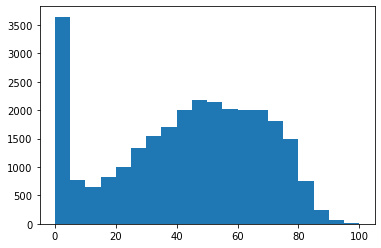

In [22]:
plt.hist(data['popularity'], bins=20)
plt.show()

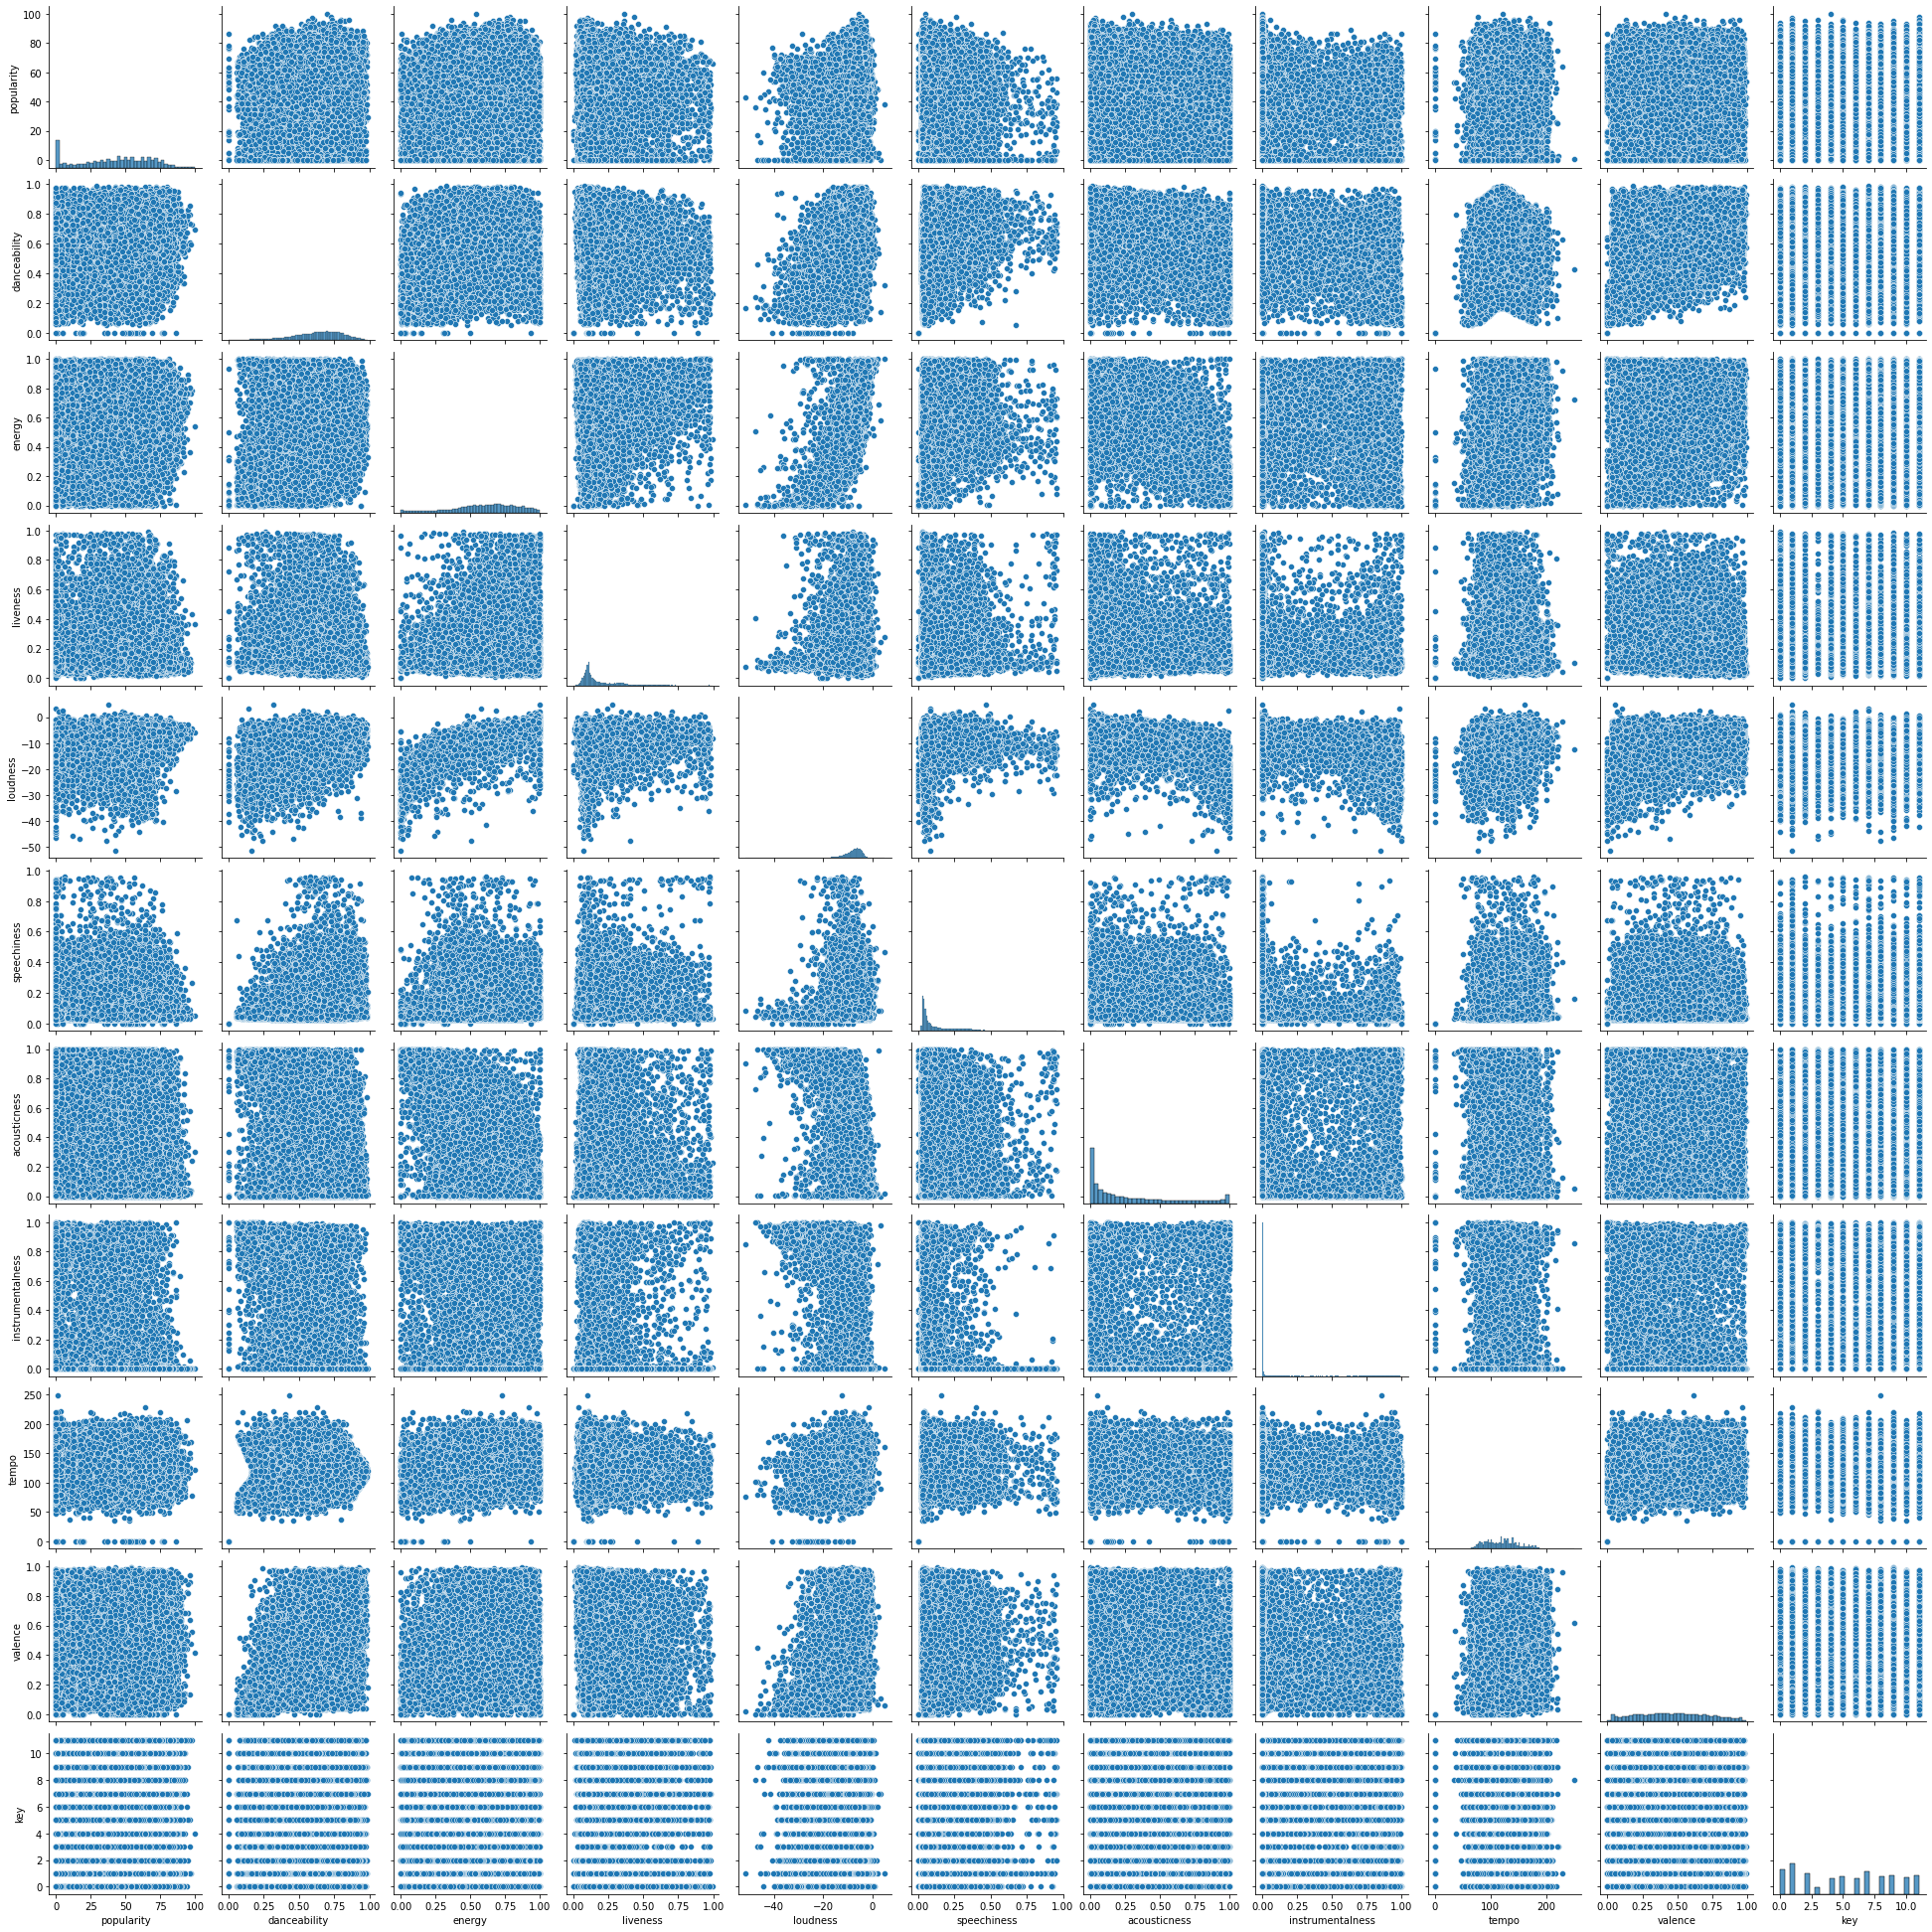

In [14]:
sns.pairplot(data)
plt.show()

In [16]:
threshold = np.quantile(data["popularity"], .90)

In [23]:
np.sum(data["popularity"] > 90)

48

In [ ]:
df = data.drop(columns=["popularity","key"])

continuous_preds_norm = (df-df.mean())/df.std()np.linalg.norm()
np.linalg.eig(continuous_preds)